<a href="https://colab.research.google.com/github/Tomokki/Python_Lesson/blob/main/%E7%B7%B4%E7%BF%92%E5%95%8F%E9%A1%8C%EF%BC%8D%E7%B7%9A%E5%BD%A2%E5%8D%98%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#喫茶店の売上データに対する　線形単回帰分析

* 回帰式を求める意義があるか検討する
*   説明変数と目的変数のグラフを作成する
* 回帰式を求める
* 回帰式の精度を確認する

##喫茶店のアイスコーヒーの売り上げとその日の最高気温についてのデータ

###データの読み込み
* icecoffee.csvをDataFrame 形式で読み込みなさい
* head関数を用いて読み込んだデータを表示しなさい

In [22]:
import pandas as pd

# icecoffee.csvをDataFrame形式で読み込む
df = pd.read_csv("icecoffee.csv")

# データの最初の数行を表示する
print(df.head())


  Unnamed: 0  temperature  icecoffee
0   2020/7/1           30         76
1   2020/7/2           28         61
2   2020/7/3           33         92
3   2020/7/4           31         84
4   2020/7/5           25         59


###データの可視化
* データを散布図で可視化し、回帰直線を引く意味があるか考察しなさい

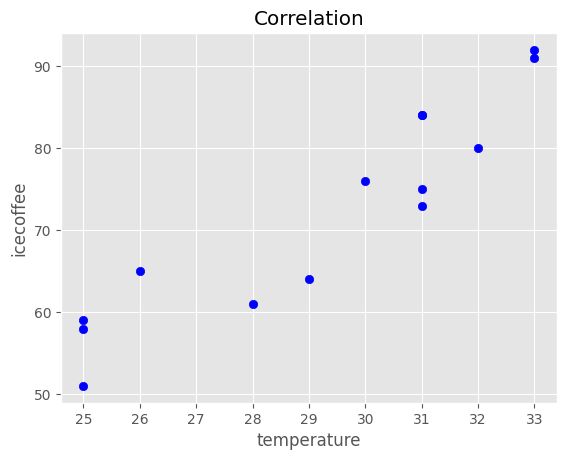

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use("ggplot")

# "temperature"と"icecoffee"の列を抽出
x = df['temperature']
y = df['icecoffee']

# データの可視化
fig, ax = plt.subplots()
ax.scatter(x,y,color = "blue")

plt.title("Correlation")
plt.xlabel("temperature")
plt.ylabel("icecoffee")
plt.show()

# データが右肩上がりになっているため回帰直線を引く意味がある

###相関係数の確認
* データの相関係数を確認しなさい

In [24]:
# 相関係数の確認
s1 = pd.Series(x)
s2 = pd.Series(y)
res = s1.corr(s2)
print(res)

# 正の相関ありと判断

0.9250159310117605


###回帰式の算出
* LinearRegressionライブラリを用いて回帰係数と切片を算出しなさい
* データ数が少ないため、学習データと検証データの分類は実施しなくてよい

In [25]:
from sklearn.linear_model import LinearRegression

# 線形単回帰モデルの生成
x = np.array(x).reshape(-1,1) #n行1列に変形
y = np.array(y)
model = LinearRegression()
model.fit(x,y)

print("intercept = ", model.intercept_) #切片
print("coefficient = ",model.coef_[0]) #傾き


# 得られた回帰式
# y = -46 + 4x

intercept =  -45.58706467661689
coefficient =  4.027363184079602


###回帰直線のグラフ化
* matplotlibを用いてデータの散布図と回帰直線をグラフ化しなさい

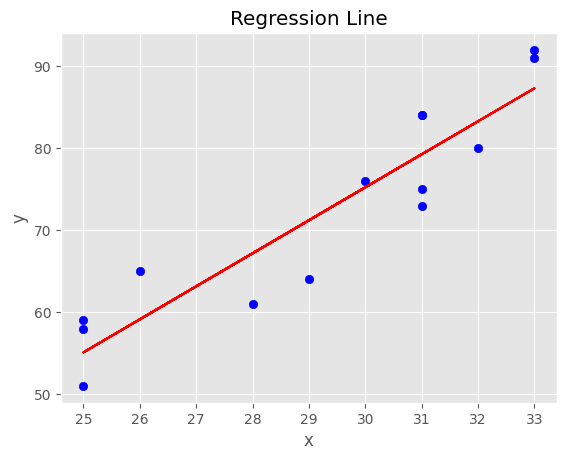

In [26]:
# matplotlibを用いてデータの散布図と回帰直線をグラフ化
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use("ggplot")


fig, ax = plt.subplots()
ax.scatter(x,y,color = "blue")

plt.plot(x,model.predict(x),color = "red")
plt.title("Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

###回帰式を用いたデータ予測
* 回帰分析から得られた回帰式を示しなさい
* 𝑦=𝑎+𝑏𝑥
* データに含まれる x の最大値は33

* x=38の時の y の値 を予測
* 𝑦=𝑎+𝑏 × 38

In [27]:
# 得られた回帰式
# y = -46 + 4x

# x=38に対する予測結果
x_38 = np.array(38).reshape(-1,1)
y_pred = model.predict(x_38)
print(y_pred[0])

107.45273631840796


###残差プロットの確認
* 残差のばらつきを見る残差分析を実施しなさい

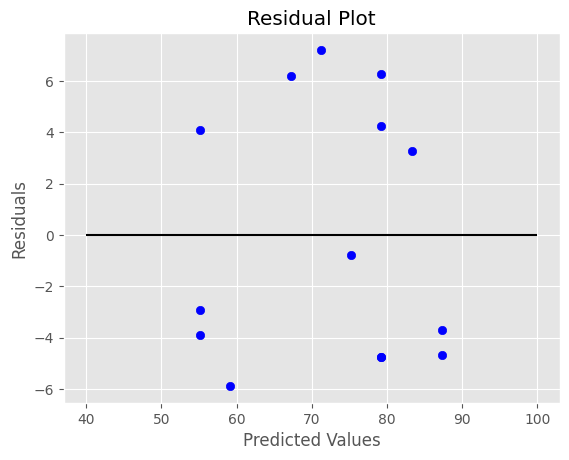

In [28]:
# 残差のばらつきを見る残差分析を実施
y_pred = model.predict(x)
plt.scatter(y_pred,y_pred - y ,color = "blue")
plt.hlines(y = 0 ,xmin = 40,xmax = 100 ,color="black")

plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

###平均二乗誤差（MSE: Mean Square Error Error）
* 平均二乗誤差を求めなさい

In [29]:
# 実際の値とモデルによる予測値との誤差の平均値
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y,y_pred))

MSE: 22.44793887704336


###決定係数𝑅 2
* 決定係数を求めなさい

In [30]:
# 実際の値とモデルによる予測値との誤差の平均値
from sklearn.metrics import r2_score
print("r^2:" ,r2_score(y,y_pred))

r^2: 0.8556544726255537
